### Lending Club: a default ratio prediction study

* [1. Background](#Background)
* [2. Importing required packages](#Import)
* [3. Loading the data](#Load)
* [4. Distribution of Loan status](#Status)
* [5. Is Charged Off similar to Default?](#ChargedOff)
* [6. Combining charged off and default loans](#combine)
* [7. Exploring effects of different featurs on loan status distribution](#explore)
    * [7.1. Loan status distribution in each year](#year)
    * [7.2. Loan status distribution vs grade](#grade)
    * [7.3. Loan status distribution vs home ownership](#home)
    * [7.4. Loan status distribution vs employment length](#empl)
    * [7.5. Loan status distribution vs annual income ](#income)
    * [7.6. Loan status distribution vs low and high ranges of Fico score](#Fico)
    * [7.7. Loan status distribution vs installment, interest rate and loan amount ](#installment)
    * [7.8. Loan status distribution vs previous charged off, banckruptcies, collections and tax liens](#tax)
    * [7.9. Loan status distribution vs utilization rate, revolving balance and inquires within 6 month of loan application](#util)
    * [7.10. Loan status distribution vs number of open accounts, mortages and number of revolving accounts](#account)
    * [7.11. Loan status distribution vs earliest credit](#earliest)
    * [7.12. DTI](#dti)
* [8. Does residential state of an applicant affect his/her performance?](#state)
* [9. Analysis of loan sub_grade, interest rate and fico score](#grade)
* [10. PCA](#pca)
* [11. Summary](#summary)
* [12. Saving the final data frame](#save)



## 1. Background <a class='anchor' id='Background'></a>

LendingClub used to be the biggest peer to peer lending platform until 2020, when they changed their business focus. During its operation, LendingClub would establish a platform for borrowers and investors where borrowers were allowed to create loan requests on its website. They were also required to provide their information like credit score, credit history, desired loan amount and the debt-to-income ratio. Based on the data, LendingClub would decide if the loan request would be accepted and what the interest rate would be. 

The data is from Kaggle website and can be found [here.](https://www.kaggle.com/wordsforthewise/lending-club) 

The original data file of the accepted loans has 151 columns and more than 2 million rows. During the data wrangling process, any columns that was not established prior to the decision was dropped. The focus is on the single applicants, therefore, join applications were also dropped. Histograms of the distributions of features did not show any abnormalities. 

In order to find out probable correlation between default and applicant's status, we will explore our data. Several questions including the following will be investigated: 
Loan status distribution across states and if an applicant's state of residence affects the fate of a loan
Loan status distribution vs home ownership and annual income
Loan status distribution vs the applicant's credit history such as credict score, previous bankruptcies and etc.

## 2. Importing required packages <a class='anchor' id='Import'></a>

We start by importing required packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


## 3. Loading the data <a class='anchor' id='Load'></a>

We load the data file that we saved from data wrangling notebook.

In [11]:
# Loading the data:

path = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\TruncatedData.csv"
df = pd.read_csv(path, sep='\t')
# Dropping the unnamed column
df = df.drop('Unnamed: 0', axis=1)

## 4. Distribution of Loan status <a class='anchor' id='Status'></a>

We check what percentages of the loans in our data is fully paid or defaulted. We plot the result and the percentages in a bar plot. There are seven categories; current, fully-paid, default, charged-off, in-grace-period, late (31-120days) and late (16-30days).

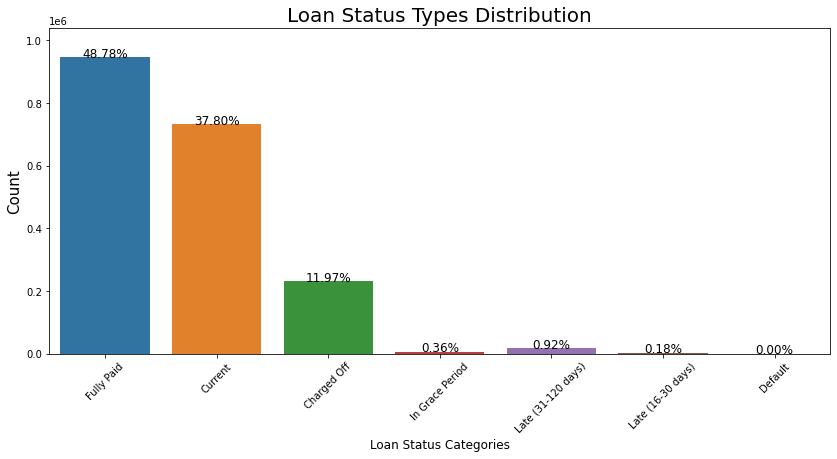

In [12]:
total = len(df)

plt.figure(figsize = (14,6))

ax = sns.countplot(x="loan_status", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("Loan Status Categories", fontsize=12)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

## 5. Is Charged Off similar to Default? <a class='anchor' id='ChargedOff'> </a>

As it is shown in the above graph only a very small number of loans are default. A question that is raised by looking at the graph is what charged-off means. A google search led us to the [lending club webpage](https://help.lendingclub.com/hc/en-us/articles/216127747-What-is-the-difference-between-a-loan-that-is-in-default-and-a-loan-that-has-been-charged-off-#:~:text=What%20is%20the%20difference%20between%20a%20loan%20that,no%20longer%20a%20reasonable%20expectation%20of%20further%20payments) . Briefly, a default is when the borower is late and charged off happens when the creditors gives up hope on getting the loan back. So default is the beginning of the process which may or may not lead to charge off. 
To investigate deeper, the original data was loaded and default and charged-off loans were compared. New data frames of deafulted and charged-off loans were created. for these loans, the expected return money was estimated by using the funded amount, interest rate and terms. The expected amount was compared with the total payment. 
In both defaulted and charged off loans, the borrower has failed to pay back the loan. For the defaulte|d loans, the recoveries (which is collected through debt collection or etc after the settlement) are all zero. For charged off loans there are some loans which has recoveries. Only in one case the amount of recoveries is bigger than the expected return. The extra return should happen due to late fees. 

In [5]:
dfCheck = pd.read_csv("C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\accepted_2007_to_2018Q4.csv")

C:\Users\somfl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
dfCheck.loc[dfCheck['loan_status']=='Fully Paid', ['total_pymnt', 'funded_amnt', 'loan_amnt', 'installment', 'int_rate', 'term', 'recoveries']]

,total_pymnt,funded_amnt,loan_amnt,installment,int_rate,term,recoveries
0,4421.723917,3600.0,3600.0,123.03,13.99,36 months,0.0
1,25679.660000,24700.0,24700.0,820.28,11.99,36 months,0.0
2,22705.924294,20000.0,20000.0,432.66,10.78,60 months,0.0
4,11740.500000,10400.0,10400.0,289.91,22.45,60 months,0.0
5,13708.948530,11950.0,11950.0,405.18,13.44,36 months,0.0
...,...,...,...,...,...,...,...
2260684,15908.001163,15000.0,15000.0,487.47,10.49,36 months,0.0
2260686,29818.871195,23800.0,23800.0,559.85,14.49,60 months,0.0
2260688,20756.233632,18000.0,18000.0,377.95,9.49,60 months,0.0
2260690,35848.764532,29400.0,29400.0,683.94,13.99,60 months,0.0


In [7]:
dfDef = dfCheck.loc[dfCheck['loan_status']=='Charged Off', ['total_pymnt', 'funded_amnt', 'loan_amnt', 'id', 'int_rate', 'term', 'recoveries']]
dfDef.sample(10)

,total_pymnt,funded_amnt,loan_amnt,id,int_rate,term,recoveries
585813,10925.48,30000.0,30000.0,115389794,30.99,60 months,0.00
934094,14700.47,28325.0,28325.0,108105961,15.05,36 months,4839.04
67171,21440.36,30000.0,30000.0,64923118,15.41,60 months,12129.39
2085221,2169.88,6400.0,6400.0,121806135,13.59,36 months,0.00
125359,2922.58,15000.0,15000.0,61468276,17.57,60 months,2197.04
1735057,6929.77,12800.0,12800.0,96246771,13.49,36 months,0.00
360580,3444.54,14000.0,14000.0,41850302,8.18,36 months,785.12
1139902,14964.65,17225.0,17225.0,34813228,24.99,60 months,1364.52
95178,2165.79,6000.0,6000.0,63044555,8.18,36 months,469.67
1307729,5166.57,4175.0,4175.0,13156099,24.08,36 months,83.19


In [8]:
dfDef['diff'] = dfDef['total_pymnt'] - dfDef['loan_amnt']*((100+dfDef['int_rate'])/100)**(36/12)
dfDef.loc[dfDef['diff']>0].sort_values(by = ['diff'])

,total_pymnt,funded_amnt,loan_amnt,id,int_rate,term,recoveries,diff
2258284,23439.24,10800.0,10800.0,90835542,19.99,36 months,23439.24,4781.505211


In [9]:
dfDef2 = dfCheck.loc[dfCheck['loan_status']=='Default', ['total_pymnt', 'funded_amnt', 'loan_amnt', 'id', 'int_rate', 'term', 'recoveries']]
dfDef2['diff'] = dfDef2['total_pymnt'] - dfDef2['loan_amnt']*((100+dfDef2['int_rate'])/100)**(36/12)
dfDef2.sample(10)

,total_pymnt,funded_amnt,loan_amnt,id,int_rate,term,recoveries,diff
2122814,884.30,2000.0,2000.0,119976809,14.08,36 months,0.0,-2085.030459
693239,4302.76,4000.0,4000.0,79074327,11.47,36 months,0.0,-1237.549094
2215128,17715.10,20025.0,20025.0,92272002,17.99,36 months,0.0,-15178.251666
2182722,20278.66,22950.0,22950.0,93700651,30.74,36 months,0.0,-31008.438694
1524260,2263.81,15000.0,15000.0,133794246,17.47,60 months,0.0,-22051.071946
2197699,4178.41,5500.0,5500.0,94155408,7.49,36 months,0.0,-2652.316209
1207115,13942.05,12000.0,12000.0,24776849,12.49,60 months,0.0,-3139.331655
487676,6832.88,25000.0,25000.0,128147895,21.45,60 months,0.0,-37952.118716
550732,15962.10,20000.0,20000.0,118632698,25.82,60 months,0.0,-23874.204027
1654996,4635.14,5400.0,5400.0,103518799,25.49,36 months,0.0,-6036.253088


In [10]:
dfDef2['recoveries'].value_counts()

0.0    40
Name: recoveries, dtype: int64

In both defaulted and charged off loans, the borrower has failed to pay back the loan. For the defaulte|d loans, the recoveries (which is collected through debt collection or etc after the settlement) are all zero. For charged off loans there are some loans which has recoveries. Only in one case the amount of recoveries is bigger than the expected return. The extra return should happen due to late fees. We can conclude that charge-off and default refer to a similar condition and we will combine the two status.



## 6. Combining charged off and default loans and dropping current loans <a  class='anchor' id='combine'></a>

As discussed earlier, charged off and default both refe to a borrower's failiure to return the loan. Therefore, the two status can be combined. Also, loans with _Current_ status, cannot be used in training models, therefore, they will be dropped. After making the changes to the status, a countplot of the loan status is plotted again.

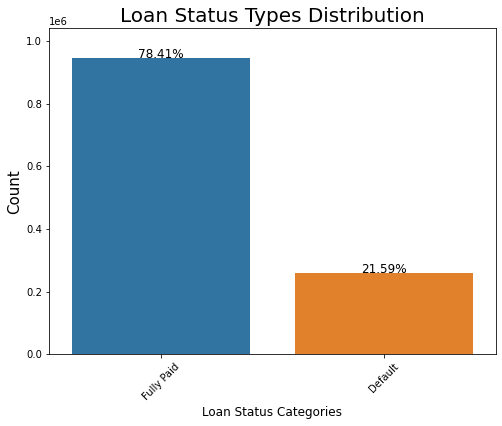

In [13]:
# Defining a new column 'new_status' and combine 'Charged Off' and 'Default' as well as any 'late' loans into one status

df['new_status'] = df['loan_status']
df.loc[df['loan_status']=='Late (31-120 days)', 'new_status'] = 'Default'
df.loc[df['loan_status']=='In Grace Period', 'new_status'] = 'Default'
df.loc[df['loan_status']=='Late (16-30 days)', 'new_status'] = 'Default'
df.loc[df['loan_status']=='Charged Off', 'new_status'] = 'Default'

#Dropping loans which are 'Current'

s = df[df['loan_status']=='Current'].index
df.drop(s, inplace=True)
total = len(df)

plt.figure(figsize = (8,6))

ax = sns.countplot(x="new_status", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("Loan Status Categories", fontsize=12)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()

df.drop(columns='loan_status', inplace=True)

After making the changes to the status, a countplot of the loan status is plotted again. It can be seen than almost 22% of loans default.

## 7. Exploring effects of different featurs on loan status distribution <a class='anchor' id='explore'></a>

Now that the data is divided into two categories: Fully-paid and Default, we can start exploring the effect of different features on loans.

### 7.1.  Loan status distribution in each year <a class='anchor' id='year'></a>

To find out how loans distributed through year, loans are categorized according to the year they are issued. As shown in the following figure, 2015 has the highest number of issued loans. However, we should also note that the current data does not include loans with _current_ status; it only includes loan with completed terms either fully paid or defaulted.  

<ipython-input-5-da90dbcf6ba0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(s.index)


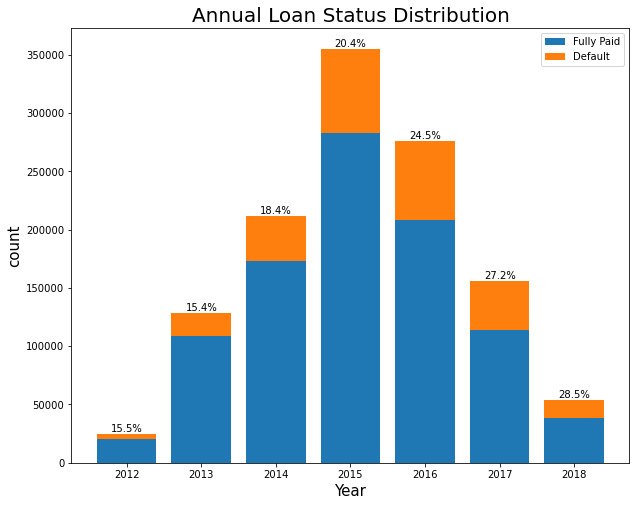

In [5]:
defaulL= df.loc[df['new_status']=='Default', ['issue_year']].value_counts()
fullL= df.loc[df['new_status']=='Fully Paid', ['issue_year']].value_counts()

s = pd.DataFrame({'Fully Paid': fullL, 'Default': defaulL})
s['Total'] = s['Default'] + s['Fully Paid']

s.index = ['2012', '2013', '2014', '2015', '2016', '2017', '2018']

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(s.index, s['Fully Paid'])
ax.bar(s.index, s['Default'], bottom=s['Fully Paid'])
ax.set_xticklabels(s.index)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.legend(['Fully Paid', 'Default'])
ax.set_title("Annual Loan Status Distribution", fontsize=20)

s_total=s['Total']
s = s.iloc[:, 0:2]
s_rel = s.div(s_total, 0)*100
n = 'Default'
for i, (cs, pc) in enumerate(zip(s.cumsum(1)[n], s_rel[n])):
    plt.text(i, cs, str(np.round(pc, 1)) + '%', va='bottom', ha='center')

plt.show()

As shown in the above plot, 2015 has the highest number of issued loans. However, we should also note that the current data does not include loans with current status; it only includes loan with completed terms either fully paid or defaulted.

### 7.2. Loan status distribution vs grade <a class='anchor' id='grade'></a>

There are 35 grades for loans starting from A1 and ending in G5. More details about grades can be found [here](https://www.lendingclub.com/foliofn/rateDetail.action). But briefly, as we move from grade A to G, the riskier the loan will be. Loan distribution vs grade is shown below. It is clear from the chart that as the grade level decreases from A to G, the probability of deafualting increases; while less than 10% of grade-A loans default, there is about 50% probability that a G-grade loan defaults. So, grade can be a strong predictor if a loan defaults.

<ipython-input-6-90e1bf9eb17e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(s.index, rotation=90)


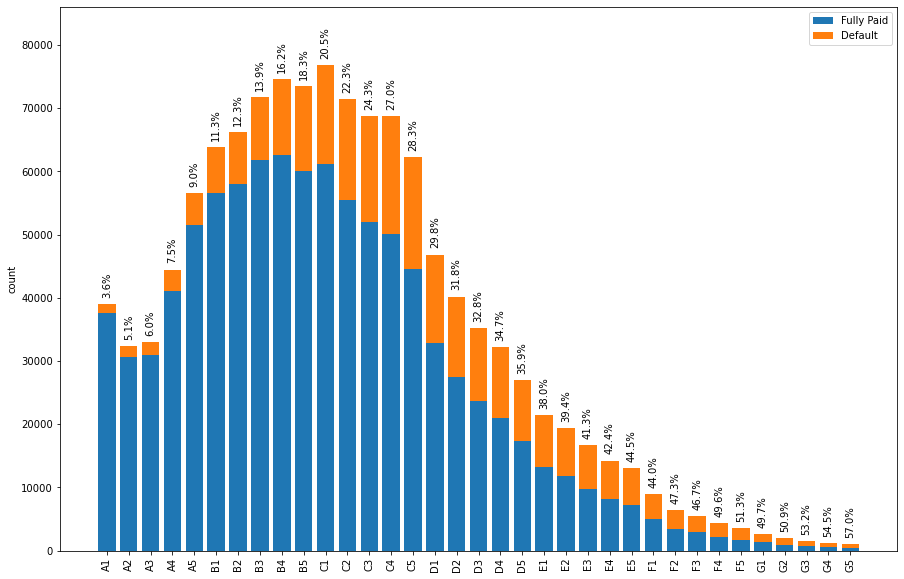

In [6]:
s = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', ['sub_grade']].value_counts(), 'Default': df.loc[df['new_status']=='Default', ['sub_grade']].value_counts()})
s.index=['A1','A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
                                            'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
                                            'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']
s['Total'] = s['Default'] + s['Fully Paid']
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(s.index, s['Fully Paid'])
ax.bar(s.index, s['Default'], bottom=s['Fully Paid'])
ax.set_xticklabels(s.index, rotation=90)
ax.set_ylabel('count')
ax.legend(['Fully Paid', 'Default'])
ax.set_ylim(0,86000)

s_total=s['Total']
s = s.iloc[:, 0:2]
s_rel = s.div(s_total, 0)*100

n = 'Default'
for i, (cs, pc) in enumerate(zip(s.cumsum(1)[n], s_rel[n])):
    plt.text(i, cs+1000 , str(np.round(pc,1)) + '%', va='bottom', ha='center', rotation=90)
#plt.subplots_adjust(hspace = 5,top = 1.2)
plt.show()

It is clear from the chart that as the grade level decreases from A to G, the probability of deafualting increases; while less than 10% of grade-A loans default, there is about 50% probability that a G-grade loan defaults. So, grade can be a strong predictor if a loan defaults.

### 7.3. Loan status distribution vs home ownership <a class='anchor' id='home' ></a>

Home ownership is also one of the features which is used to make decision on a loan application. Below the distribution of loan status vs the applicants' home type is shown. Majority of applicants live either in their own house, a rental place or mortage. In all these categories the percentages of default is almost the same. Therefore, home ownership cannot be a strong predictor for loan defaultation. 

<ipython-input-7-1db13f5d0970>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(s.index, rotation=45)


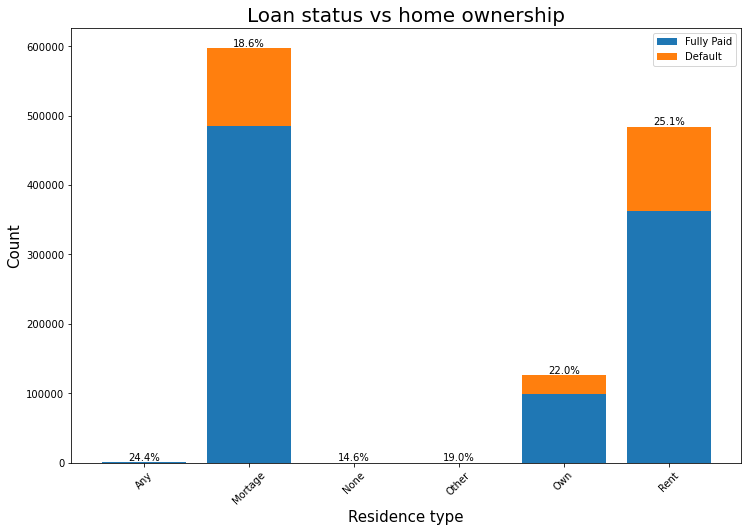

In [7]:
s = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', ['home_ownership']].value_counts(), 'Default': df.loc[df['new_status']=='Default', ['home_ownership']].value_counts()})
s['Total'] = s['Default'] + s['Fully Paid']
s.index=[ 'Any', 'Mortage', 'None', 'Other', 'Own', 'Rent']
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(s.index, s['Fully Paid'])
ax.bar(s.index, s['Default'], bottom=s['Fully Paid'])
ax.set_xticklabels(s.index, rotation=45)
ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Residence type', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title("Loan status vs home ownership", fontsize=20)


s_total=s['Total']
s = s.iloc[:, 0:2]

s_rel = s.div(s_total, 0)*100

n = 'Default'
for i, (cs, pc) in enumerate(zip(s.cumsum(1)[n], s_rel[n])):
    plt.text(i, cs, str(np.round(pc, 1)) + '%', va='bottom', ha='center')

plt.show()                      

As shown in the bar plot, majority of applicants live either in their own house, a rental place or mortage. In all these categories the percentages of default is almost the same. Therefore, home ownership cannot be a strong predictor for loan defaultation. 

### 7.4. Loan status distribution vs employment length <a class='anchor' id='empl' ></a>

Length of employment is categorized into 11 groups, starting from less than a year to 10 years and longer. According to the data, the chances are the same. Theregore, employment length is also not a great predictor 

<ipython-input-8-60fb2f82ba8b>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(s.index, rotation=45)


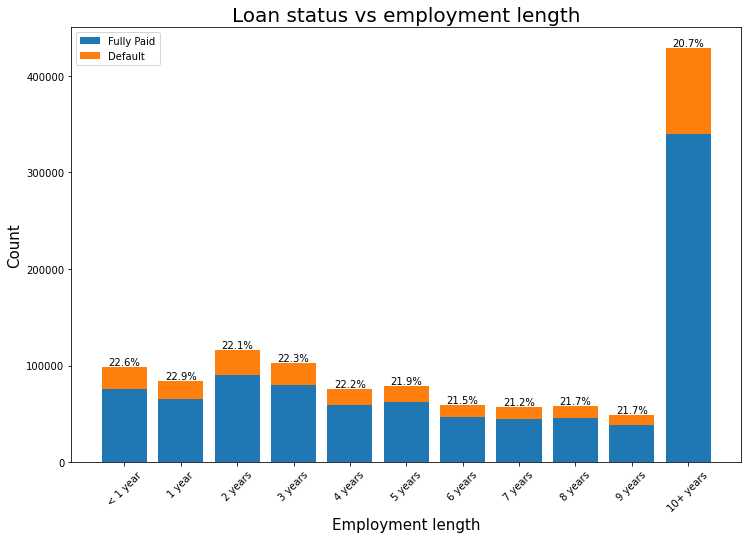

In [8]:
s = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', ['emp_length']].value_counts(), 'Default': df.loc[df['new_status']=='Default', ['emp_length']].value_counts()})
listIndex = s.index

new = []
for item in listIndex:
    new.append(''.join(item))
s.index = new

s = s.reindex(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years',
    '7 years', '8 years', '9 years', '10+ years'])

s['Total'] = s['Default'] + s['Fully Paid']

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(s.index, s['Fully Paid'])
ax.bar(s.index, s['Default'], bottom=s['Fully Paid'])
ax.set_xticklabels(s.index, rotation=45)
ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Employment length', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title("Loan status vs employment length", fontsize=20)


s_total=s['Total']
s = s.iloc[:, 0:2]
s_rel = s.div(s_total, 0)*100

n = 'Default'
for i, (cs, pc) in enumerate(zip(s.cumsum(1)[n], s_rel[n])):
    plt.text(i, cs, str(np.round(pc, 1)) + '%', va='bottom', ha='center')

plt.show()

As shown in the bar plot, almost in all employment categories, the chances of default is around 21%. Therefore, length of employment does not affect fate of a loan considerably.

### 7.5. Loan status distribution vs annual income <a class='anchor' id='income'></a>

The effect of applicant's annual income is shown below. It can be seen that, the annual income histogram is clustered at the very first bin and that means there are few applicants with very high incomes. There are 1678 applicants with income higher than $500k. However, in data wrangling I checked the verification status, and they are all legit data. 

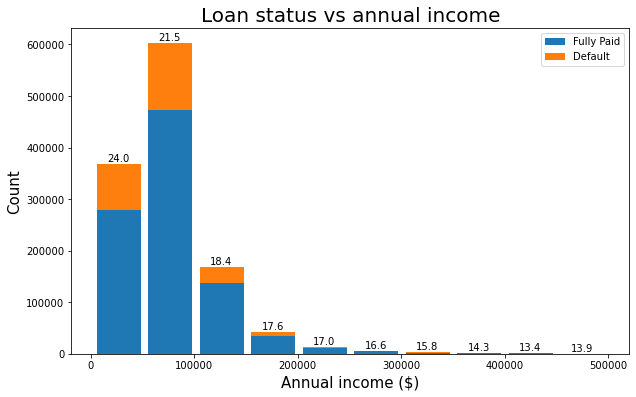

In [42]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'annual_inc'], 'Default': df.loc[df['new_status']=='Default', 'annual_inc']}, index=None)
s1 = s1[(s1['Fully Paid']<500000) | (s1['Default']<500000)]


fig, ax = plt.subplots() 

s1.plot.hist(stacked=True, bins=10, rwidth=0.85, figsize=(10, 6), ax=ax)


#axes[0].set_xticklabels(s.index, rotation=45)
ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Annual income ($)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title("Loan status vs annual income", fontsize=20)


p = ax.patches
for i in range(0,10,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + 10000
    Y1 = p[i].get_height()
    Y2 = p[i+10].get_height()
    y = Y2 + Y1 +5000
    a = Y2/(Y2 + Y1)
    ax.text(x, y, round(a*100,1), rotation=0)
    



In [43]:
print('The number of applicants with income high than $500k is: ', len(df.loc[df['annual_inc']>500000]))

The number of applicants with income high than $500k is:  1678


As mentioned earlier, the income are verified. So, I keep these values.

It can be seen from the bar plot that the percentage of application that ends in default categories decreases as income increases, which makes sense.

### 7.6. Loan status distribution vs Fico score <a class='anchor' id='Fico'></a>

[FICO credit scores](https://www.consumerfinance.gov/ask-cfpb/what-is-a-fico-score-en-1883/) are a method of quantifying and evaluating an individual’s creditworthiness. Scores range from 300 to 850, with scores in the 670 to 739 range considered to be “good”.  Fico score is also one important factor to decide about a loan application. As shown below, Fully  paid loans have higher scores comapred to defaulted loans. As an applicant's credit score increases, the chances that he/she defaults on his/her loans decreases. 

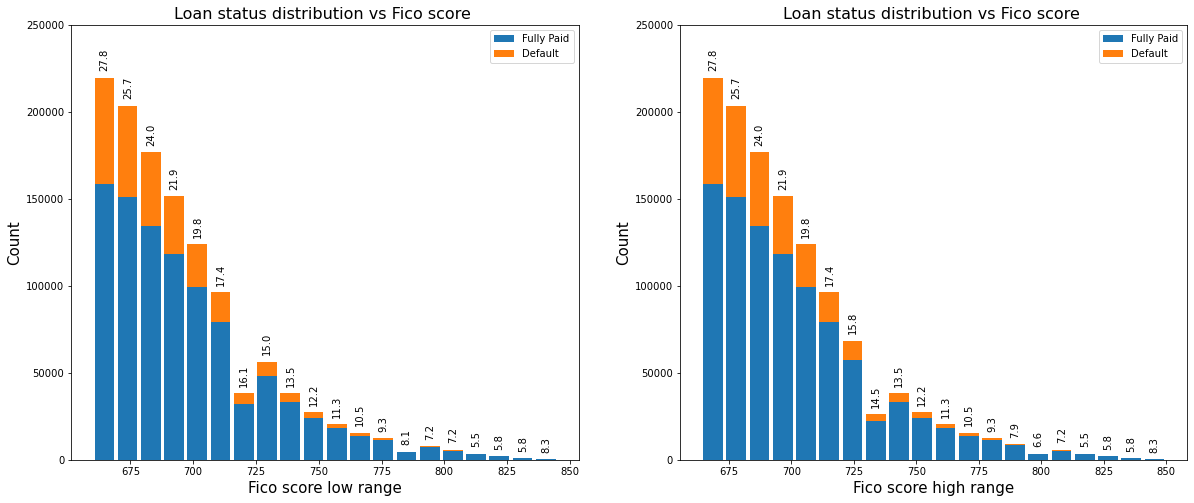

In [14]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'fico_range_low'], 'Default': df.loc[df['new_status']=='Default', 'fico_range_low']}, index=None)
s2 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'fico_range_high'], 'Default': df.loc[df['new_status']=='Default', 'fico_range_high']}, index=None)

fig, [axes0, axes1] = plt.subplots(nrows = 1, ncols = 2, figsize=(20,8))

axes0.hist(s1, stacked=True, bins=20, rwidth=0.85)
axes1.hist(s2, stacked=True, bins=20, rwidth=0.85)

axes0.legend(['Fully Paid', 'Default'])
axes0.set_xlabel('Fico score low range', fontsize=15)
axes0.set_ylabel('Count', fontsize=15)
axes0.set_title("Loan status distribution vs Fico score ", fontsize=16)
axes0.set_ylim(0,250000)

axes1.legend(['Fully Paid', 'Default'])
axes1.set_xlabel('Fico score high range', fontsize=15)
axes1.set_ylabel('Count', fontsize=15)
axes1.set_title("Loan status distribution vs Fico score ", fontsize=16)
axes1.set_ylim(0,250000)

p = axes0.patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + 2
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 5000
    a = Y2/(Y2 + Y1)
    axes0.text(x, y, round(a*100,1), rotation=90)
    
p = axes1.patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + 2
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 5000
    a = Y2/(Y2 + Y1)
    axes1.text(x, y, round(a*100,1), rotation=90)

Fully  paid loans have higher scores comapred to defaulted loans. As an applicant's credit score increases, the chances that he/she defaults on his/her loans decreases. 

### 7.7. Loan status distribution vs installment, interest rate, loan amount and loan term <a class='anchor' id='installment'></a>

The effect of the loan amount, interest rate, installment and loans' term are shown below. Loan amount is the amount of money that a borrower asks for, while installment, interst rates and term are factors which are determined by Lending Club. It seems that loans with higher amounts that result in higher installment and longer terms are riskier.
When inerest rate increases, default ratio also increases; for loans under lower than 10% interest rates, less than 10% of loans default, however, loans with 30% or higher interest rates has more than 50% chance of default. 


It should be noted that, the applicant's credentials determines the interest rate. As discussed earlier, Lending Club gives a grade (A1 to G5) to each loan, the riskier the applicant is, the grade is higher. As it is shown in th figure, as the grade increases, the interest rate also increases.

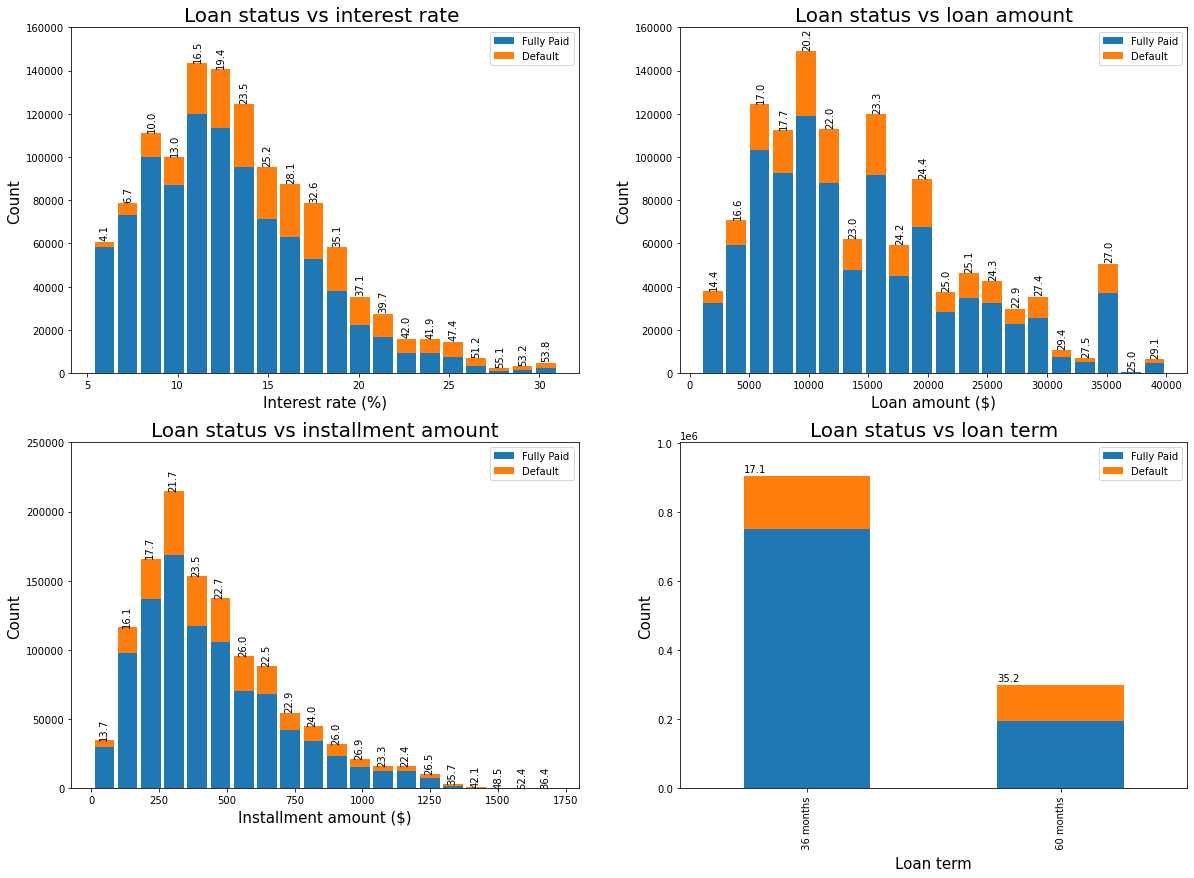

In [15]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'int_rate'], 'Default': df.loc[df['new_status']=='Default', 'int_rate']}, index=None)
s2 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'funded_amnt'], 'Default': df.loc[df['new_status']=='Default', 'funded_amnt']}, index=None)
s3 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'installment'], 'Default': df.loc[df['new_status']=='Default', 'installment']})
s4 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', ['term']].value_counts(), 'Default': df.loc[df['new_status']=='Default', ['term']].value_counts()})
listIndex = s4.index

new = []
for item in listIndex:
    new.append(''.join(item))
s4.index = new

fig, [(axes0, axes1), (axes2, axes3)] = plt.subplots(nrows = 2, ncols = 2, figsize=(20,14))

axes0.hist(s1, stacked=True, bins=20, rwidth=0.85)
axes1.hist(s2, stacked=True, bins=20, rwidth=0.85)
axes2.hist(s3, stacked=True, bins=20, rwidth=0.85)
#axes3.bar(s4.index, s4, stacked=True)
s4.plot.bar(stacked=True, ax=axes3)

axes0.legend(['Fully Paid', 'Default'])
axes0.set_xlabel('Interest rate (%)', fontsize=15)
axes0.set_ylabel('Count', fontsize=15)
axes0.set_title("Loan status vs interest rate ", fontsize=20)
axes0.set_ylim(0,160000)

axes1.legend(['Fully Paid', 'Default'])
axes1.set_xlabel('Loan amount ($)', fontsize=15)
axes1.set_ylabel('Count', fontsize=15)
axes1.set_title('Loan status vs loan amount', fontsize=20)
axes1.set_ylim(0,160000)

axes2.legend(['Fully Paid', 'Default'])
axes2.set_xlabel('Installment amount ($)', fontsize=15)
axes2.set_ylabel('Count', fontsize=15)
axes2.set_title('Loan status vs installment amount', fontsize=20)
axes2.set_ylim(0,250000)

axes3.legend(['Fully Paid', 'Default'])
axes3.set_xlabel('Loan term', fontsize=15)
axes3.set_ylabel('Count', fontsize=15)
axes3.set_ylim(0,1002000)
axes3.set_title("Loan status vs loan term", fontsize=20)


p = axes0.patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + .3
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 1500
    a = Y2/(Y2 + Y1)
    axes0.text(x, y, round(a*100,1), rotation=90)
    
p = axes1.patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + 500
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 1500
    a = Y2/(Y2 + Y1)
    axes1.text(x, y, round(a*100,1), rotation=90)
    
p = axes2.patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + 15
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 1500
    a = Y2/(Y2 + Y1)
    axes2.text(x, y, round(a*100,1), rotation=90)
    
p = axes3.patches
for i in range(0,2,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1
    Y1 = p[i].get_height()
    Y2 = p[i+2].get_height()
    y = Y2 + Y1 +10000
    a = Y2/(Y2 + Y1)
    axes3.text(x, y, round(a*100,1), rotation=0)
plt.show()    

Loans with higher amounts that result in higher installment and longer terms are riskier.
When inerest rate increases, default ratio also increases; for loans under lower than 10% interest rates, less than 10% of loans default, however, loans with 30% or higher interest rates has more than 50% chance of default. 

### 7.8. Loan status distribution vs previous charged off, banckruptcies, collections and tax liens  <a class='anchor' id='tax'></a>

Another set of information that credit companies look for when they decide about loan application is the credit history of the applicants: previous collections, charged off accounts, [public record](https://pocketsense.com/public-records-credit-report-8005283.html) and [tax liens](https://www.irs.gov/businesses/small-businesses-self-employed/understanding-a-federal-tax-lien). As shown below, applicants who fail to pay their loan fully and those who pay their loan completely do not differ significantly in their credit history.

<ipython-input-44-605a06157caa>:46: RuntimeWarning: invalid value encountered in double_scalars
  a = Y2/(Y2 + Y1)
<ipython-input-44-605a06157caa>:57: RuntimeWarning: invalid value encountered in double_scalars
  a = Y2/(Y2 + Y1)
<ipython-input-44-605a06157caa>:69: RuntimeWarning: invalid value encountered in double_scalars
  a = Y2/(Y2 + Y1)
<ipython-input-44-605a06157caa>:80: RuntimeWarning: invalid value encountered in double_scalars
  a = Y2/(Y2 + Y1)


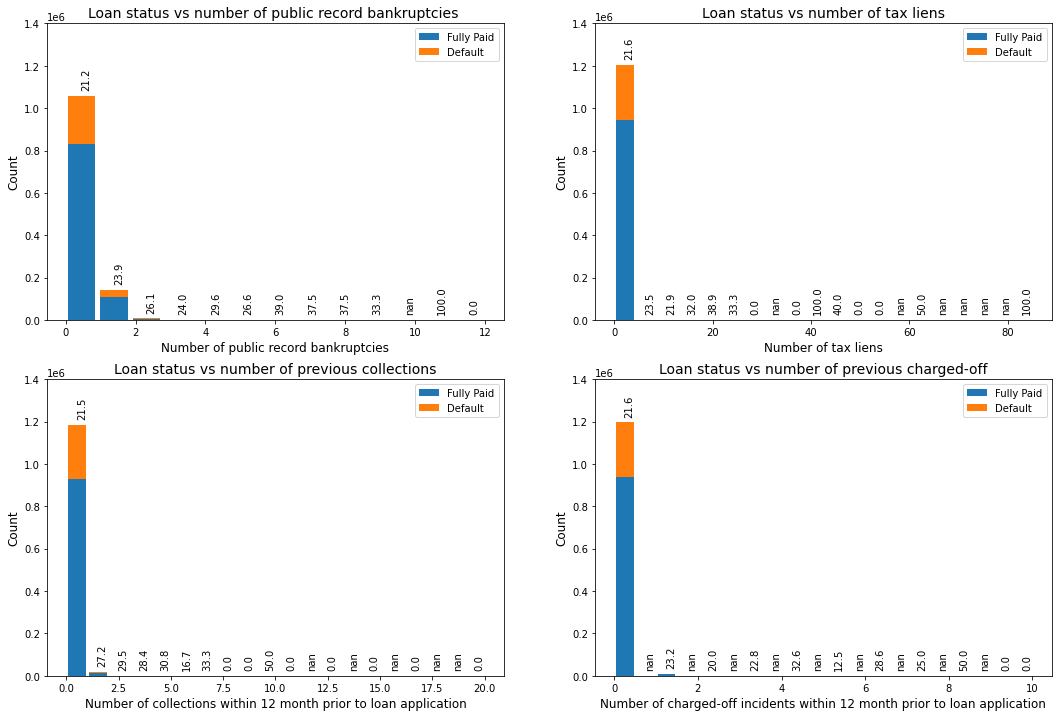

In [44]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'pub_rec_bankruptcies'], 'Default': df.loc[df['new_status']=='Default', 'pub_rec_bankruptcies']}, index=None)
s2 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'tax_liens'], 'Default': df.loc[df['new_status']=='Default', 'tax_liens']}, index=None)
s3 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'collections_12_mths_ex_med'], 'Default': df.loc[df['new_status']=='Default', 'collections_12_mths_ex_med']}, index=None)
s4 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'chargeoff_within_12_mths'], 'Default': df.loc[df['new_status']=='Default', 'chargeoff_within_12_mths']}, index=None)


fig, [(axes0, axes1), (axes2, axes3)] = plt.subplots(nrows = 2, ncols = 2, figsize=(18,12))

axes0.hist(s1, stacked=True, bins=13, rwidth=0.85)
axes1.hist(s2, stacked=True, bins=20, rwidth=0.85)
axes2.hist(s3, stacked=True, bins=20, rwidth=0.85)
axes3.hist(s4, stacked=True, bins=20, rwidth=0.85)

axes0.legend(['Fully Paid', 'Default'])
axes0.set_xlabel('Number of public record bankruptcies', fontsize=12)
axes0.set_ylabel('Count', fontsize=12)
axes0.set_ylim(0,1400000)
axes0.set_title("Loan status vs number of public record bankruptcies ", fontsize=14)

axes1.legend(['Fully Paid', 'Default'])
axes1.set_xlabel('Number of tax liens', fontsize=12)
axes1.set_ylabel('Count', fontsize=12)
axes1.set_ylim(0,1400000)
axes1.set_title('Loan status vs number of tax liens', fontsize=14)

axes2.legend(['Fully Paid', 'Default'])
axes2.set_xlabel('Number of collections within 12 month prior to loan application', fontsize=12)
axes2.set_ylabel('Count', fontsize=12)
axes2.set_ylim(0,1400000)
axes2.set_title('Loan status vs number of previous collections', fontsize=14)

axes3.legend(['Fully Paid', 'Default'])
axes3.set_xlabel('Number of charged-off incidents within 12 month prior to loan application', fontsize=12)
axes3.set_ylabel('Count', fontsize=12)
axes3.set_ylim(0,1400000)
axes3.set_title('Loan status vs number of previous charged-off', fontsize=14)

p = axes0.patches
for i in range(0, 13,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + p[i].get_width()/2.
    Y1 = p[i].get_height()
    Y2 = p[i+ 13].get_height()
    y = Y2 + Y1 + 35000
    a = Y2/(Y2 + Y1)
    axes0.text(x, y, round(a*100,1), rotation=90) 

p = axes1.patches
for i in range(0, 20, 1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + p[i].get_width()/2.
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 35000
    a = Y2/(Y2 + Y1)
    axes1.text(x, y, round(a*100,1), rotation=90)   

    
p = axes2.patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + p[i].get_width()/2. 
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 35000
    a = Y2/(Y2 + Y1)
    axes2.text(x, y, round(a*100,1), rotation=90)
    
p = axes3.patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + p[i].get_width()/2. 
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 35000
    a = Y2/(Y2 + Y1)
    axes3.text(x, y, round(a*100,1), rotation=90)
plt.show()


As shown in above plots, applicants who fail to pay their loan fully and those who pay their loan completely do not differ significantly in their credit history. However, it is apparent that there is a great difference among applicants. While majority of applicants do not have any bank ruptcies or tax liens, there are a few number of applicants that have more than 10 bankruptcies and more than 80 tax liens, respectively. Also, while majority of applicants do not have collections or charged off events, there are a few who have more than 10 collections or 20 charged off incidents.

### 7.9. Loan status distribution vs utilization rate, revolving balance and inquires within 6 month of loan application  <a class='anchor' id='util'></a>

The next set of features that is investigated describe how an applicant uses their credit on the time of loan application. Features including [revolving balance](https://www.creditcards.com/credit-card-news/glossary/term-revolving-balance/#:~:text=In%20credit%20card%20terms%2C%20a%20revolving%20balance%20is,on%20the%20amount%20borrowed%20and%20the%20amount%20repaid.), the ratio of used credit to the credit limit, which is [utilization rate](https://www.experian.com/blogs/ask-experian/credit-education/score-basics/credit-utilization-rate/), and credit inquires are shown below. Apparently there is not signifant difference between defaulted and fully paid loans in this regard.

<ipython-input-18-c2cc04995285>:35: RuntimeWarning: invalid value encountered in double_scalars
  a = Y2/(Y2 + Y1)
<ipython-input-18-c2cc04995285>:46: RuntimeWarning: invalid value encountered in double_scalars
  a = Y2/(Y2 + Y1)
<ipython-input-18-c2cc04995285>:58: RuntimeWarning: invalid value encountered in double_scalars
  a = Y2/(Y2 + Y1)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

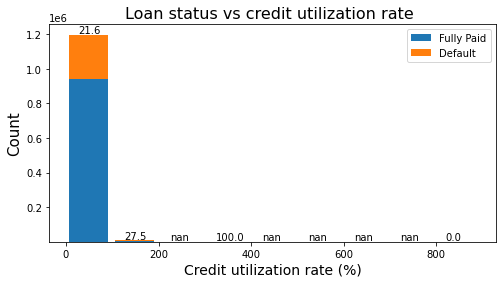

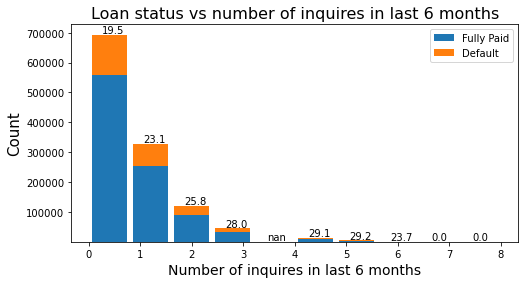

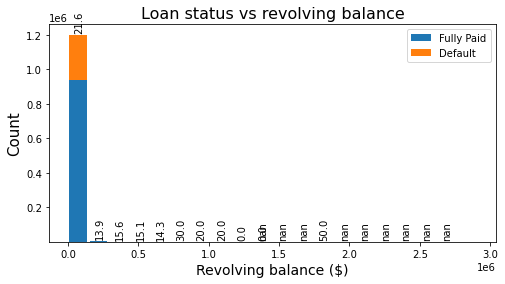

In [18]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'revol_util'], 'Default': df.loc[df['new_status']=='Default', 'revol_util']}, index=None)
s2 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'inq_last_6mths'], 'Default': df.loc[df['new_status']=='Default', 'inq_last_6mths']}, index=None)
s3 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'revol_bal'], 'Default': df.loc[df['new_status']=='Default', 'revol_bal']}, index=None)

plt.figure()
fig, axes = plt.subplots(3,1) # create 3*1 array of subplots
fig.clf()
axes[0] = s1.plot.hist(stacked=True, bins=9, rwidth=0.85, figsize=(8,4))
axes[1] = s2.plot.hist(stacked=True, bins=10, rwidth=0.85, figsize=(8,4))
axes[2] = s3.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(8,4))

axes[0].legend(['Fully Paid', 'Default'])
axes[0].set_xlabel('Credit utilization rate (%)', fontsize=14)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].set_title("Loan status vs credit utilization rate ", fontsize=16)

axes[1].legend(['Fully Paid', 'Default'])
axes[1].set_xlabel('Number of inquires in last 6 months', fontsize=14)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].set_title('Loan status vs number of inquires in last 6 months', fontsize=16)

axes[2].legend(['Fully Paid', 'Default'])
axes[2].set_xlabel('Revolving balance ($)', fontsize=14)
axes[2].set_ylabel('Count', fontsize=15)
axes[2].set_title('Loan status vs revolving balance', fontsize=16)

p = axes[0].patches
for i in range(0,9,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + 20
    Y1 = p[i].get_height()
    Y2 = p[i+9].get_height()
    y = Y2 + Y1 + 10000
    a = Y2/(Y2 + Y1)
    axes[0].text(x, y, round(a*100,1), rotation=0) 

p = axes[1].patches
for i in range(0,10,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1+.2 
    Y1 = p[i].get_height()
    Y2 = p[i+10].get_height()
    y = Y2 + Y1 + 5000
    a = Y2/(Y2 + Y1)
    axes[1].text(x, y, round(a*100,1), rotation=0)   

    
p = axes[2].patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = (x1 + x2)/2 -40000
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 20000
    a = Y2/(Y2 + Y1)
    axes[2].text(x, y, round(a*100,1), rotation=90)
    

plt.show()

Histograms of _revolving balance_ and _utilization rate_ are skewed. Normally, There are a few number of applicants with extremely high utilization rates and revolving balances. Such conditions happen when an applicant has mortages and loans. 

### 7.10. Loan status distribution vs number of open accounts, mortages and number of revolving accounts  <a class='anchor' id='account'></a>

Below, loan status distribution vs number of open accounts, mortages and number of revolving accounts is plotted. It can be seen that as number of open accounts an applicant owns increases, chances of defaulting also increases. However, if the number of mortages increases, the probability of defaulting on a loan decreases. Also, as number of revolving accounts increases, probability of deafult slightly decreases.

<ipython-input-22-40858a684de1>:49: RuntimeWarning: invalid value encountered in double_scalars
  a = Y2/(Y2 + Y1)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

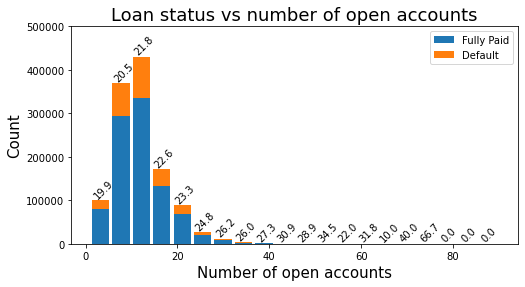

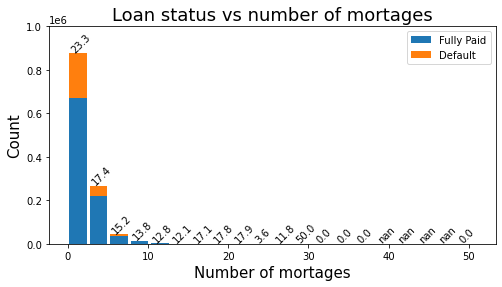

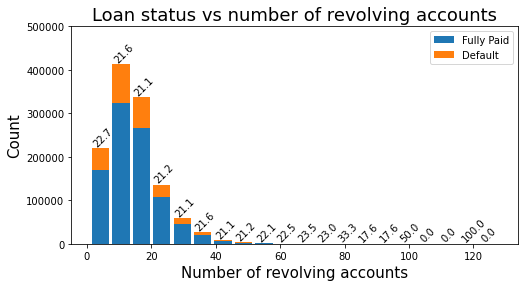

In [22]:
s1 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'open_acc'], 'Default': df.loc[df['new_status']=='Default', 'open_acc']}, index=None)
s2 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'mort_acc'], 'Default': df.loc[df['new_status']=='Default', 'mort_acc']}, index=None)
s3 = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'num_rev_accts'], 'Default': df.loc[df['new_status']=='Default', 'num_rev_accts']}, index=None)

plt.figure()
fig, axes = plt.subplots(3,1) # create 3*1 array of subplots
fig.clf()
axes[0] = s1.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(8,4))
axes[1] = s2.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(8,4))
axes[2] = s3.plot.hist(stacked=True, bins=20, rwidth=0.85, figsize=(8,4))

axes[0].legend(['Fully Paid', 'Default'])
axes[0].set_xlabel('Number of open accounts', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].set_title("Loan status vs number of open accounts", fontsize=18)
axes[0].set_ylim(0,500000)

axes[1].legend(['Fully Paid', 'Default'])
axes[1].set_xlabel('Number of mortages', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].set_title('Loan status vs number of mortages', fontsize=18)
axes[1].set_ylim(0,1000000)

axes[2].legend(['Fully Paid', 'Default'])
axes[2].set_xlabel('Number of revolving accounts', fontsize=15)
axes[2].set_ylabel('Count', fontsize=15)
axes[2].set_title('Loan status vs number of revolving accounts', fontsize=18)
axes[2].set_ylim(0,500000)

p = axes[0].patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 4000 
    a = Y2/(Y2 + Y1)
    axes[0].text(x, y, round(a*100,1), rotation=45)
    
p = axes[1].patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 4000
    a = Y2/(Y2 + Y1)
    axes[1].text(x, y, round(a*100,1), rotation=45)
    
p = axes[2].patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 4000 
    a = Y2/(Y2 + Y1)
    axes[2].text(x, y, round(a*100,1), rotation=45)
    
plt.show()

It can be seen from above plots that as number of open accounts an applicant owns increases, chances of defaulting also increases. However, if the number of mortages increases, the probability of defaulting on a loan decreases. Also, as number of revolving accounts increases, probability of deafult slightly decreases.

### 7.11. Loan status distribution vs earliest credit  <a class='anchor' id='earliest'></a>

The length of an applicant credit history also effects terms of a loan application. To investigate the credit length, the date when an applicant got his/her first credit card is available. pd.to_datetime fuction was used to convert this column to datetime and the diffence between this value and the loan issue date was found. As it is shown in the chart, the credit length is not a significant indicator of the fate of a loan.

<ipython-input-23-387278d485b5>:19: RuntimeWarning: invalid value encountered in double_scalars
  a = Y2/(Y2 + Y1)


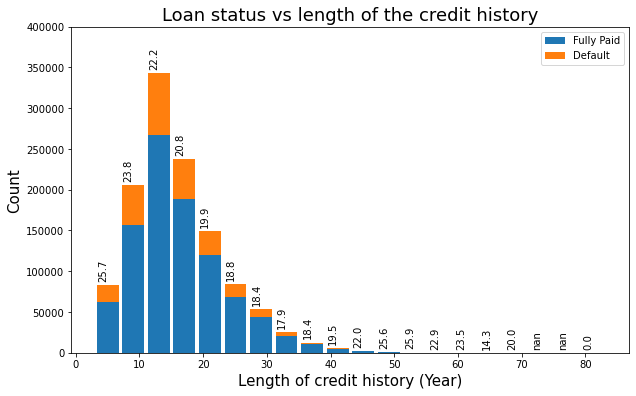

In [23]:
df['Credit Length (year)'] = (pd.to_datetime(df['issue_d'])-pd.to_datetime(df['earliest_cr_line']))/np.timedelta64(1,'Y')
s = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'Credit Length (year)'], 'Default': df.loc[df['new_status']=='Default', 'Credit Length (year)']}, index=None)
ax = s.plot.hist(stacked=True, bins=20, figsize=(10, 6), rwidth=0.85)

ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Length of credit history (Year)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title("Loan status vs length of the credit history", fontsize=18)
ax.set_ylim(0,400000)

p = ax.patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 +.2
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 7000
    a = Y2/(Y2 + Y1)
    plt.text(x, y, round(a*100,1), rotation=90)

As shown in the plot, the length of credit history does not affect the fate of a loan considerably.

### 7.12. DTI : debt to income ratio <a class='anchor' id='dti'></a>

Debt-to-income ratio compares one's total monthly debt obligations to their monthly gross income (before taxes). The DTI ratio gives lenders a clearer picture of an applicant's current debt and income, and it is used to determine how much money the applicant can afford to responsibly borrow.
[DTI](https://www.lendingclub.com/loans/resource-center/calculating-debt-to-income) histogram is shown below and it can be seen that when DTI is high, the chances of an applicant defaults on their loan increases. 

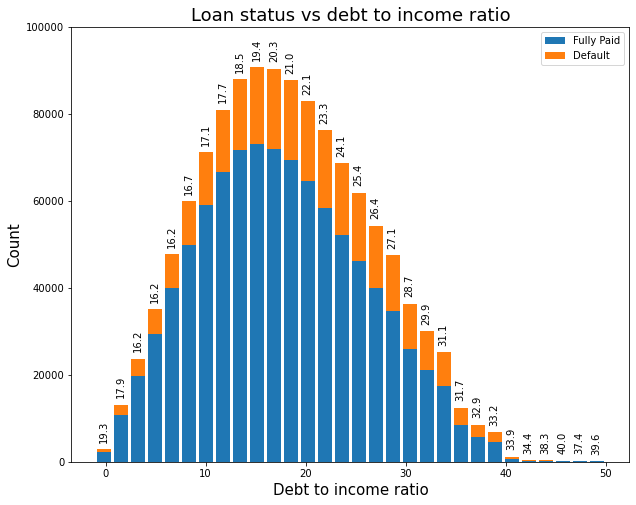

In [24]:
s = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', 'dti'], 'Default': df.loc[df['new_status']=='Default', 'dti']}, index=None)
ax = s.plot.hist(stacked=True, bins=30, figsize=(10, 8), rwidth=0.85)

ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Debt to income ratio', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title("Loan status vs debt to income ratio", fontsize=18)
ax.set_ylim(0,100000)

p = ax.patches
heights = [patch.get_height() for patch in p]

for i in range(0,30,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 +.2
    Y1 = p[i].get_height()
    Y2 = p[i+30].get_height()
    y = Y2 + Y1 + 2000
    a = Y2/(Y2 + Y1)
    plt.text(x, y, round(a*100,1), rotation=90)
plt.show()

It can be seen that when DTI is high, the chances of an applicant defaults on their loan increases.

## 8. Shall we treat states equally? Does the applicant's residential state affect their performance?  <a class='anchor' id='state'></a>

In order to find out if states are different, first the population of each state was found and the number of loans issued per 10,000 was estimated in each state. 
Then the percentage of defaulted and fully-paid loans were determined and shown in the figure.
NV has the highest number of loans issued per 10,000 capita and IA has the lowest number of loans issued per 10,000 capita. However, 50% of loans issued in IA are finally defaulted. Does this mean that IA residents perform significantly worse than other states' residents? To answer this question, we had a closer look at IA. There are only two loans issued in this state, which is a very small number to make any hypothesis. 

In [333]:
s.loc[s.index=='IA', :]

,Default,Fully Paid
IA,1,1


<ipython-input-25-dedec987e91c>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(s1.index, rotation=90)


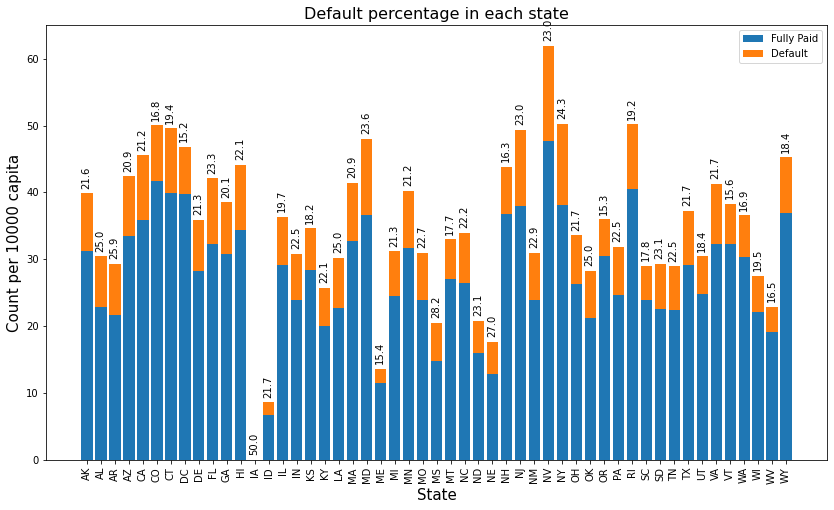

In [25]:
# Loading the data of each state population

Path = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\population.csv"
pop = pd.read_csv(Path, sep=" ")
pop = pop.set_index('abb')

# Count the number of fully paid and defaulted loans in each state
s = pd.DataFrame({'Default': df.loc[df['new_status']=='Default', ['addr_state']].value_counts(),
                  'Fully Paid': df.loc[df['new_status']=='Fully Paid', ['addr_state']].value_counts()})
listIndex = s.index
new = []
for item in listIndex:
    new.append(''.join(item))
s.index = new

# Joining population data with loan data

s1 = s.join(pop)
s1['Total'] = s1['Default'] + s1['Fully Paid']
s1['Default_per_10000'] = s1['Default']/s1['population']*10000
s1['FullyPaid_per_10000'] = s1['Fully Paid']/s1['population']*10000

fig, ax =plt.subplots(nrows=1, ncols=1, figsize=(14,8))

ax.bar(s1.index, s1['FullyPaid_per_10000'])
ax.bar(s1.index, s1['Default_per_10000'], bottom=s1['FullyPaid_per_10000'])
ax.set_xticklabels(s1.index, rotation=90)
ax.set_ylabel('Count per 10000 capita', fontsize=15)
ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('State', rotation=0, fontsize=15)
ax.set_title('Default percentage in each state', fontsize=16)

p = ax.patches
heights = [patch.get_height() for patch in p]

length = len(new)
for i in range(0,length,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 
    Y1 = p[i].get_height()
    Y2 = p[i+length].get_height()
    y = Y2 + Y1 + 1
    a = Y2/(Y2 + Y1)
    plt.text(x, y, round(a*100,1), rotation=90)

plt.show()


NV has the highest number of loans issued per 10,000 capita and IA has the lowest number of loans issued per 10,000 capita. However, 50% of loans issued in IA are finally defaulted. Does this mean that IA residents perform significantly worse than other states' residents? To answer this question, we had a closer look at IA. There are only two loans issued in this state, which is a very small number to make any hypothesis. 

## 9. Analysis of loan sub_grade, interest rate and fico score <a class='anchor' id='grade'></a>

Below, boxplots of interest rate and fico score versus loan subgrades are shown. As discussed earlier there are 5 grades (A to G) and in each grade there are 7 sub-levels. Based on an applicant's qualifications, A1 is the best subgrade an applicant can have and G5 is the worst. It can be seen that applications in G5 have lower fico scores and higher interest rates. Interest rates increases from grade A to G and reaches a plateau in grade G.

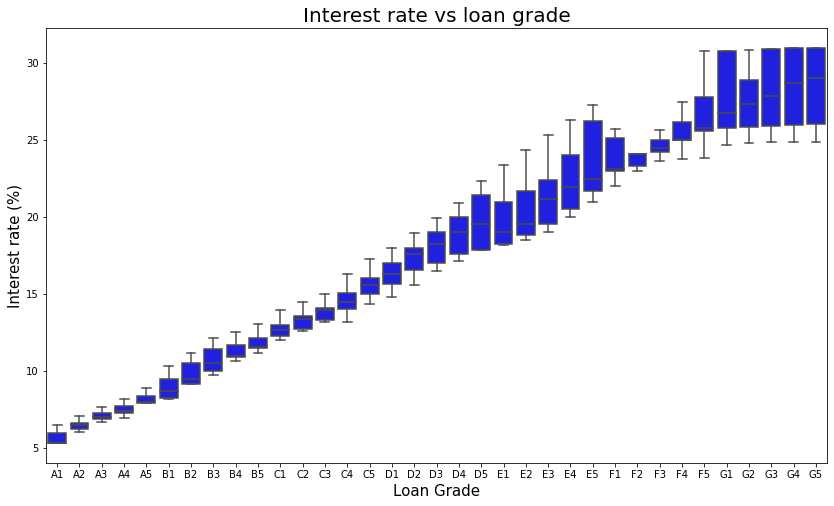

In [26]:
fig, ax=plt.subplots(figsize=(14, 8))
sns.boxplot(x="sub_grade", y="int_rate", data=df, order =['A1','A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
                                            'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
                                            'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], sym="", color='blue', ax=ax)

#ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Loan Grade', fontsize=15)
ax.set_ylabel('Interest rate (%)', fontsize=15)
ax.set_title("Interest rate vs loan grade", fontsize=20)

plt.show()

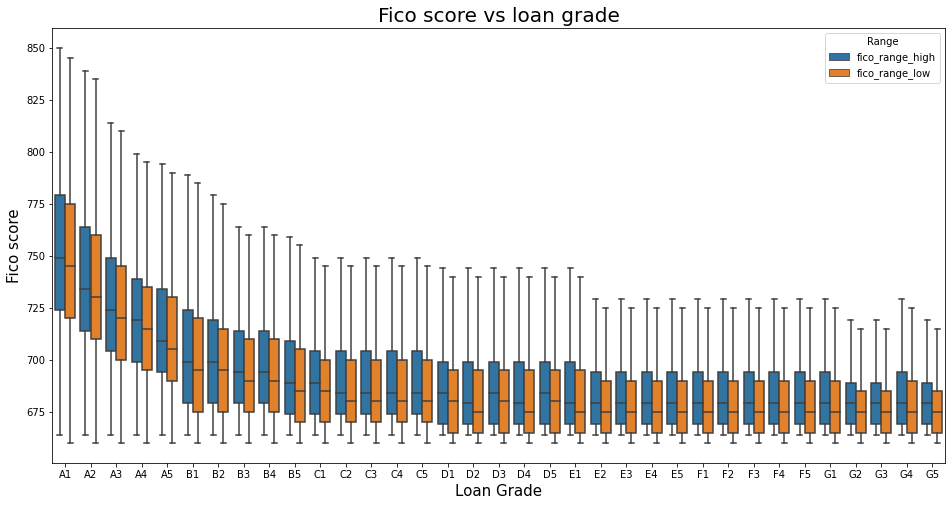

In [27]:
dff = df[['sub_grade', 'fico_range_high', 'fico_range_low']]
data = pd.melt(dff, id_vars=['sub_grade'], value_vars=['fico_range_high', 'fico_range_low'], var_name='Range', value_name='Fico score')

fig, ax=plt.subplots(figsize=(16,8))
sns.boxplot(x="sub_grade", y='Fico score', hue='Range', data=data, order =['A1','A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
                                            'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
                                            'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], sym="", ax=ax)

#ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Loan Grade', fontsize=15)
ax.set_ylabel('Fico score', fontsize=15)
ax.set_title("Fico score vs loan grade", fontsize=20)

plt.show()

It can be seen that applications in G5 have lower fico scores and higher interest rates. Interest rates increases from grade A to G and reaches a plateau in grade G.

## 10. Principle Componenet Analysis <a class='anchor' id='pca'></a>

The principal component analysis is performed. All the numeric features are included in the analysis and they are first scaled and then the analysis is done. As shown in the figure, only 32% of the variance is explained by two features, which indicates the complexity of our data. 8 of the PCA components can explain 80% of variance in our data.

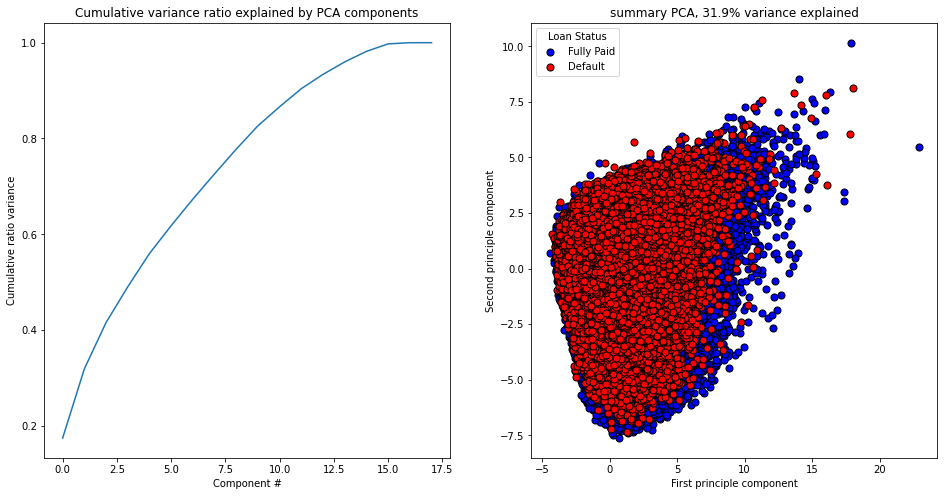

PCA components:                                    0         1         2         3         4   \
revol_util                 -0.042484  0.393156 -0.259907 -0.169999  0.370725   
dti                         0.025087  0.158613  0.272355 -0.579706  0.098904   
chargeoff_within_12_mths    0.002665  0.037750  0.051545  0.130987  0.037595   
collections_12_mths_ex_med -0.027504  0.034718  0.051263  0.118435 -0.049324   
inq_last_6mths              0.020249  0.113287  0.259019  0.174532 -0.426726   
open_acc                    0.267065  0.086671  0.504106 -0.171771 -0.064392   
mort_acc                    0.271478  0.028602  0.035493  0.280895  0.256066   
annual_inc                  0.371398  0.065147 -0.178512  0.289915  0.048690   
funded_amnt                 0.424707  0.175482 -0.281883 -0.065356 -0.292881   
installment                 0.407098  0.198414 -0.284300 -0.063265 -0.310912   
int_rate                   -0.086715  0.366833 -0.017253 -0.140125 -0.392654   
revol_bal              

In [33]:
Y = df['new_status']
X_numeric = df.select_dtypes(np.number)
X = X_numeric.drop(columns=['issue_year', 'id'])
cols = X.columns
X_scaled = pd.DataFrame(scale(X), columns = cols)
pca = PCA()

df_pca = pca.fit(X_scaled)
df_loadings = df_pca.components_
df_loadings = pd.DataFrame(df_loadings, columns=cols)
df_pca_x = df_pca.transform(X_scaled)
df_PCA_x = pd.DataFrame(df_pca_x, index=X.index)
X_pca = df_PCA_x.loc[:, 0:1]

data = X_pca.join(Y)
data.columns = ['PCA1', 'PCA2', 'Status']

fig, (axes0, axes1) =plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes0.plot(df_pca.explained_variance_ratio_.cumsum())
axes0.set_xlabel('Component #')
axes0.set_ylabel('Cumulative ratio variance')
axes0.set_title('Cumulative variance ratio explained by PCA components');

# Plot
axes1.scatter(data.loc[data['Status']=='Fully Paid', 'PCA1'], data.loc[data['Status']=='Fully Paid', 'PCA2'], c='blue', edgecolor='k', s=50, label='Fully Paid')
axes1.scatter(data.loc[data['Status']=='Default', 'PCA1'], data.loc[data['Status']=='Default', 'PCA2'], c='red', edgecolor='k', s=50, label='Default')
pc_var = 100 * df_pca.explained_variance_ratio_.cumsum()[1]

axes1.set_xlabel('First principle component')
axes1.set_ylabel('Second principle component')
axes1.set_title(f'summary PCA, {pc_var:.1f}% variance explained')
axes1.legend(loc='best', title='Loan Status', fontsize=10)
plt.show();

print('PCA components: ', df_loadings.T)

## 11. Summary  <a class='anchor' id='summary'></a>

Effects of various features on the loan status distribution were studied. Below is a summary of findings:

1. Length of employment, as well as home ownership is not a great predictor of fate of a loan


2. Applicants with higher credit scores are also better borrowers and it is shown that defaulted loans have applicants with lower credit scores. 


3. Previous charged off accounts or bankruptcies in an applicant's credit history or the length of the applicant's credit history do not affect how he/she performs on his/her loan return. Furthermore, the applicant's balance and how musch he/she uses their credit on the time of application (ie utilization rate) do not affect how he/she will return the loan. While, the nuumbr of credit accounts an applicant owns is not a determinant in the fate of a loan, applicants with more mortages tend to perform better.  


4. As the installment increases, the probability of a loan defaultation also increases. Furthermore, higher interest rates also result in higher chance of default. Also, while 30% of loans with 30 month return period default, this value doubles for loans with 60 month return period.  


5. DTI, debt-to-income ratio which compares an applicant's total monthly debt obligations to their monthly gross income is a good predictor of default, and as DTI increases chances of defaultation also increases.


6. There are 35 grades for loans starting from A1 and ending in G5. Briefly, as a loan moves from A1 to G5, the riskier the loan will be. It is clear from the chart of Loan distribution vs grade that as loan grade decreases from A1 to G5, the probability of deafualting increases; while less than 10% of grade-A loans default, there is about 50% probability that a G-grade loan defaults. So, grade can be a strong predictor of if a loan defaults. Furthermore, as shown moving from A1 grade to G5, interest rate also increases. It is seen that in G category, the interest rate reaches a plateau of about 30%. 


7. We also checked to see if the state where an applicant lives affect how they perform on their loans. while in some states more number of loans are issued per capita, applicants in different states are similar in their loan performance.


8. Principle component analysis on the numerical features also showed that, loan amount, dti, Fico scores and revolving balance are important in the first 2 principle components. Only about 32% of the variance is explained by the first two componenets.

9. We should note that, installment and interest rate, as well as subgrade are features determined by the lending club based on an application. 



## 12. Saving the final data frame <a class='anchor' id='save'></a>

In [46]:
df = df.drop(columns = ['issue_d', 'addr_state', 'issue_year', 'earliest_cr_line'])
df = df.rename(columns={'new_status': 'Status'})

SavePath = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\LendingClubClean.csv"
df.to_csv(SavePath, sep=',')